In [15]:
#Import tools 

import scipy
from scipy.io import loadmat
from scipy.stats import skew
from scipy.stats import kurtosis

import numpy as np
import matplotlib.pyplot as plt

import torch

import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD #stochastic gradient descent 
import seaborn as sns 
from matplotlib import ticker

32768
510


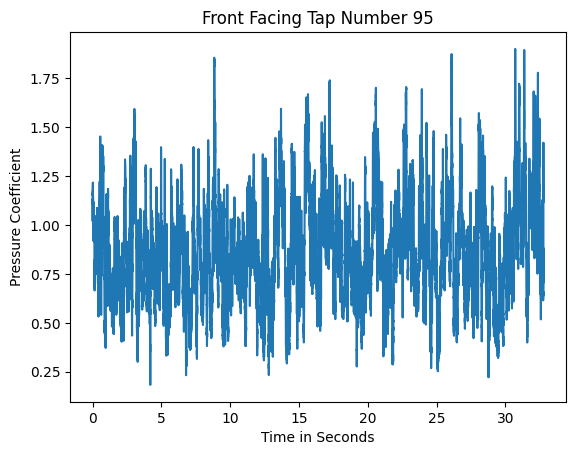

In [22]:
#Import data 
#Read the matlab data

data_mat = loadmat("../../../data/T215_4_000_1.mat")
#print(data_mat)

#take just the wind pressure coefficient matrix
cp = data_mat["Wind_pressure_coefficients"]

#n= number of timesteps 
n_time  = np.shape(cp)[0]
n_taps  = np.shape(cp)[1]

print(n_time)
print(n_taps)

#sf= sampling frequncy = how many recordings per sec 
sf = 1000.0

#dt = 1 sec/ number of recordings per second = time per step 
dt = 1.0/sf

#Plot Cp time history
#T = time per step times the number of steps = total time
T = dt*n
# x = the time at each point 
x = np.linspace(0, T, n, False) 
tap_no = 95


y = cp[:, tap_no-1]
plt.plot(x, y)
plt.ylabel('Pressure Coefficient')
plt.xlabel('Time in Seconds')
#plt.suptitle('Tap )
plt.title('Front Facing Tap Number {}'.format(tap_no))             
plt.show()





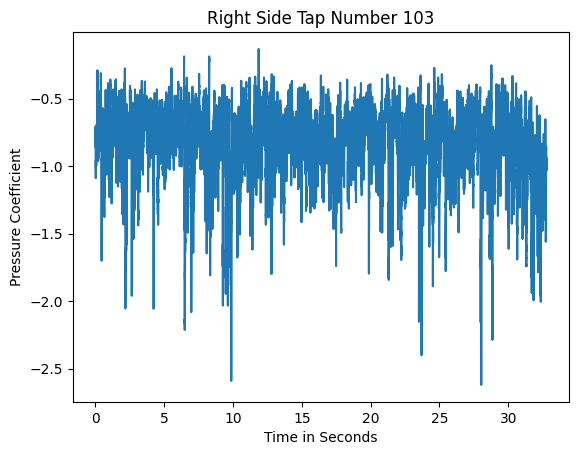

In [3]:
#Do the same but for a right side tap 
tap_no = 103


y = cp[:, tap_no-1]
plt.plot(x, y)
plt.ylabel('Pressure Coefficient')
plt.xlabel('Time in Seconds')
#plt.suptitle('Tap )
plt.title('Right Side Tap Number {}'.format(tap_no))             
plt.show()

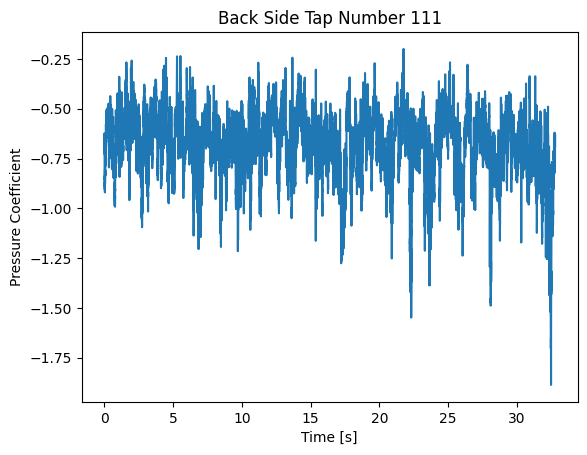

In [4]:
#Do the same but for a back tap 
tap_no = 111


y = cp[:, tap_no-1]
plt.plot(x, y)
plt.ylabel('Pressure Coefficient')
plt.xlabel('Time [s]')
#plt.suptitle('Tap )
plt.title('Back Side Tap Number {}'.format(tap_no))             
plt.show()

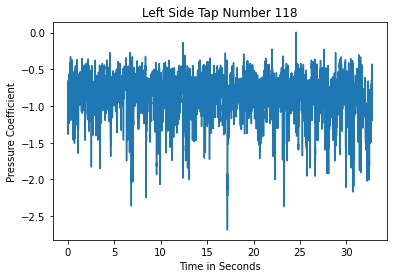

In [13]:
#Do the same but for a left Side tap 
tap_no = 118


y = cp[:, tap_no-1]
plt.plot(x, y)
plt.ylabel('Pressure Coefficient')
plt.xlabel('Time in Seconds')
#plt.suptitle('Tap )
plt.title('Left Side Tap Number {}'.format(tap_no))             
plt.show()

In [5]:
#split the data into training, validating, and testing 

tap_no = 118
y = cp[:, tap_no-1]


train_size  = int(n*0.8)
valid_size  = int(n*0.1)
test_size  = int(n*0.1)

print("Train set size: {}, Validation set size: {}, Test set size: {}"
      .format(train_size, valid_size, test_size))

#training data
train_x  = x[:train_size] 
train_y  = y[:train_size]

#validating data 
valid_x  = x[train_size:train_size + valid_size]
valid_y  = y[train_size:train_size + valid_size]

#test data
test_x  = x[-test_size:] 
test_y  = y[-test_size:]


Train set size: 26214, Validation set size: 3276, Test set size: 3276


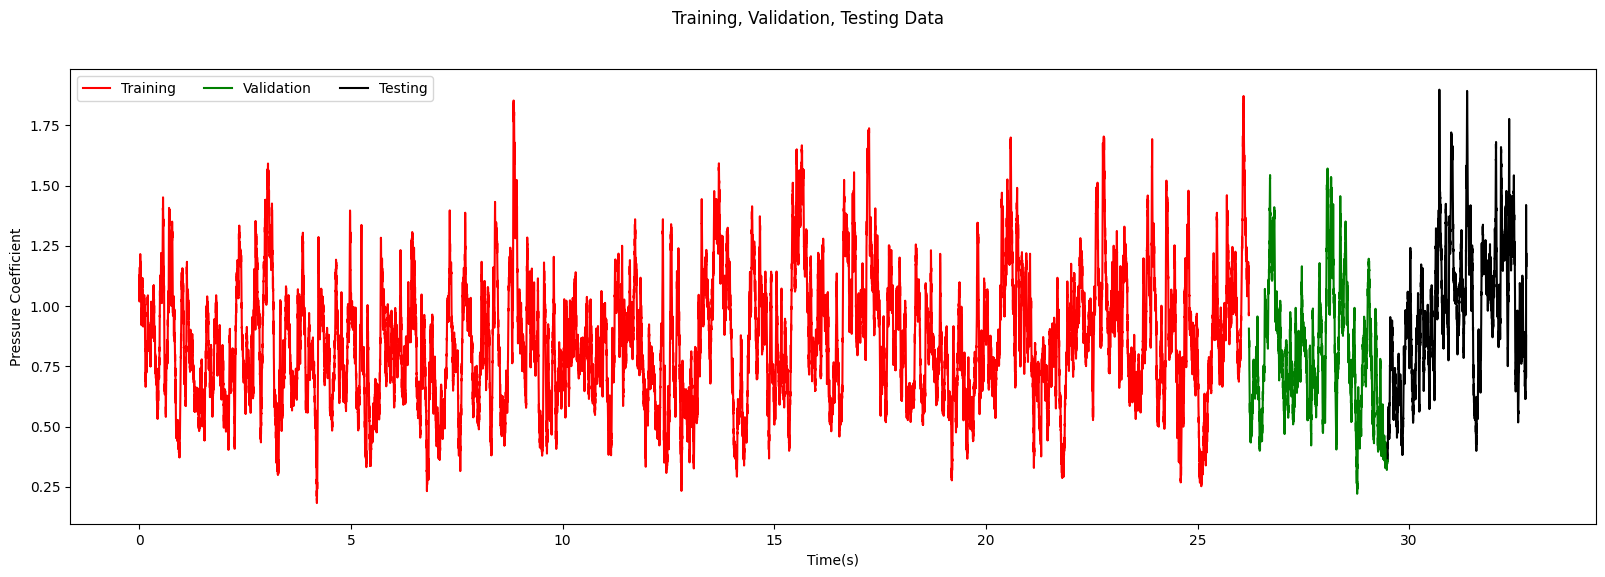

In [24]:
#n= number of timesteps 

#sf= sampling frequncy = how many recordings per sec 
sf = 1000.0

#dt = 1 sec/ number of recordings per second = time per step 
dt = 1.0/sf

#Plot Cp time history
#T = time per step times the number of steps = total time
T = dt*n
# x = the time at each point 
x = np.linspace(0, T, n, False)



fig, (ax) = plt.subplots()
fig.suptitle('Training, Validation, Testing Data')
#ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Time(s)')
ax.set_ylabel('Pressure Coefficient')
ax.plot(x[:train_size], y[:train_size], 'r-', linewidth=1.5)
ax.plot(x[train_size:train_size+valid_size], 
         y[train_size:train_size+valid_size], 'g-', linewidth=1.5)
ax.plot(x[-test_size:], y[-test_size:], 'k-', linewidth=1.5)
#ax.set_xlim(left=0, right=5)
#ax.set_ylim(bottom=0, top=5)

ax.legend(['Training', 'Validation', 'Testing'], ncol=3, frameon=True) 
fig.set_size_inches(50/2.54, 15/2.54) 
#plt.tight_layout()
#fig.savefig('Plots/MLP_devided_data_sample.pdf')
#fig.savefig('Plots/MLP_devided_data_sample.png')
#plt.show()

## Create Features in numpy

In [38]:
n_features  = 7
#in the next lines we need to change : to a shorter duration instead of all the times (need to do this for train, valid, and test) [510, 6]
#so we will have one value for each sunset (train, validate, test) for each feature (add wind angle as a feature?) for each sensor which will correspond 
# with a max from the entire dataset (do tap# and wind angle also have to be an input?) 
#so we will need to repeat this step for each wind angle for training, validating and for testing???
features  = np.zeros((n_taps, n_features))
#[tap,feature]
features[:, 0] = np.mean(cp, axis=0)
features[:, 1] = np.std(cp, axis=0)
features[:,2] = scipy.stats.skew(cp, axis=0)
features[:,3] = scipy.stats.kurtosis(cp, axis=0)
features[:,4] = np.max(cp, axis=0)
features[:,5] = np.min(cp, axis=0)
features[:,6] = features[:,4] - features[:,5]

np.shape(features)

#peak is the max for the whole duration and will be the same value for train, valid, and test for an individual sensor at a given wind angle 
peak = np.zeros((n_taps, 1))
#for k in range(n)
 #   peak[k,0] = np.max(cp[k,:]) #need absolute max here?

In [55]:
import random

# Create a list of numbers from 0 to 509
numbers = list(range(n_taps))

# Shuffle the numbers randomly
random.shuffle(numbers)

# Print the shuffled numbers
print(numbers)

[168, 435, 95, 159, 147, 301, 121, 169, 42, 341, 290, 325, 433, 184, 337, 427, 86, 243, 238, 132, 104, 453, 439, 20, 144, 389, 409, 140, 446, 502, 125, 313, 421, 151, 216, 32, 61, 158, 392, 377, 501, 269, 236, 146, 74, 37, 155, 395, 173, 404, 53, 499, 4, 288, 334, 227, 118, 278, 383, 353, 223, 176, 488, 134, 297, 304, 494, 160, 191, 429, 509, 294, 308, 424, 397, 299, 316, 257, 202, 391, 445, 8, 188, 189, 180, 422, 30, 195, 235, 489, 108, 226, 314, 217, 437, 479, 124, 246, 436, 349, 154, 387, 129, 283, 98, 90, 58, 43, 251, 182, 268, 281, 327, 66, 505, 51, 215, 434, 148, 374, 289, 259, 393, 19, 369, 82, 311, 380, 65, 394, 490, 181, 485, 317, 310, 94, 3, 80, 282, 347, 21, 339, 114, 300, 252, 388, 331, 291, 508, 245, 351, 221, 46, 478, 23, 307, 309, 178, 444, 131, 368, 413, 137, 460, 506, 12, 163, 56, 423, 161, 414, 260, 45, 344, 22, 79, 410, 143, 150, 67, 156, 240, 306, 363, 48, 133, 136, 266, 405, 201, 17, 407, 234, 179, 319, 185, 324, 192, 483, 152, 2, 7, 209, 457, 211, 85, 88, 141, 101

In [58]:

#number of taps in training, testing, and validating 
n_training = int(0.8*n_taps)
n_validation = int(0.1*n_taps)
n_testing = int(0.1*n_taps)

train_features = np.zeros((n_training, n_features))
validate_features = np.zeros((n_validation, n_features))
test_features = np.zeros((n_testing, n_features))


for i in range(0, n_training):
    idx = numbers[i]
    train_features[i,:] = features[idx, :]

for i in range(0, n_validation, 1):
    idx = numbers[i+n_testing]
    validate_features[i,:] = features[idx, :]

for i in range(0,n_testing, 1):
    idx = numbers[i+n_testing+n_validation]
    test_features[i,:] = features[idx, :] 

print(test_features)

[[ 3.83921176e-01  2.04089686e-01  4.59214270e-01  3.39747429e-01
   1.29426861e+00 -3.03520352e-01  1.59778896e+00]
 [-8.79073024e-01  3.25582743e-01 -1.13022339e+00  1.94976568e+00
   5.05913747e-03 -2.84693384e+00  2.85199298e+00]
 [ 6.81046963e-01  2.44056538e-01  4.42853808e-01  1.01032495e-01
   1.80454159e+00  1.56192277e-02  1.78892236e+00]
 [ 4.39920872e-01  2.16877505e-01  3.80828261e-01  2.01448679e-01
   1.33587992e+00 -2.61210799e-01  1.59709072e+00]
 [-8.61713707e-01  2.61410624e-01 -1.28617966e+00  2.86424160e+00
  -2.62070775e-01 -2.78394246e+00  2.52187169e+00]
 [-8.35948110e-01  2.56314993e-01 -9.43808913e-01  1.80134821e+00
   2.31065392e-01 -2.45087075e+00  2.68193614e+00]
 [-8.31415415e-01  2.91385382e-01 -1.30480635e+00  2.64087296e+00
  -6.78995401e-02 -2.54802847e+00  2.48012893e+00]
 [ 7.57891774e-01  2.37187028e-01  4.63453025e-01  7.52534866e-02
   1.65812254e+00  7.59873092e-02  1.58213523e+00]
 [-8.66082728e-01  3.16627949e-01 -1.48556876e+00  3.43339825e+0